In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys
sys.path.append(r'C:\Data\Python\Characterisation_Report_scripts\src\analysis')
import overview_tuning

In [2]:
sys.path.insert(0,r'C:\Data\Python\DGA_simulator\src')

os.chdir(r'C:\Data\Python\DGA_simulator\src')
import spectrum_simulator

In [33]:
test=spectrum_simulator.spectrum_simulator()

In [34]:
test.set_step_size(0.01)
test.set_piezo_tuning_method(method='Hysteresis',hysteresis_param=0.8,nr_steps=200,wl_range=[3200,3400],v_range=[10,90] )
test.load_PNNL_data()
test.set_lineshape_convolution_method('Gaussian',FWHM=1)
test.set_power_spectrum_method(method='Box',steepnes=10,wl_range=[3200,3350])
test.generate_lineshapes()
test.calculate_lineshape_convolution()
test.calculate_sum_absorbance()
test.set_concentrations('Methane',100)
test.set_concentrations('Ethane',1)
test.set_concentrations('Propane',0)
test.set_drift_parameters(drift_params=[0,1000000,0,75,0,0],drift_enable=None,drift_time=-1)
test.set_noise_parameters(method=None,laser_noise_rsd=1,detector_noise_sd=1,electronics_noise_sd=1,file=None)
test.calculate_noise()

In [35]:
test.set_concentrations('Methane',1)
test.set_concentrations('Ethane',1)
test.set_concentrations('Propane',1)
test.set_concentrations('Butane',1)

1

<IPython.core.display.Javascript object>


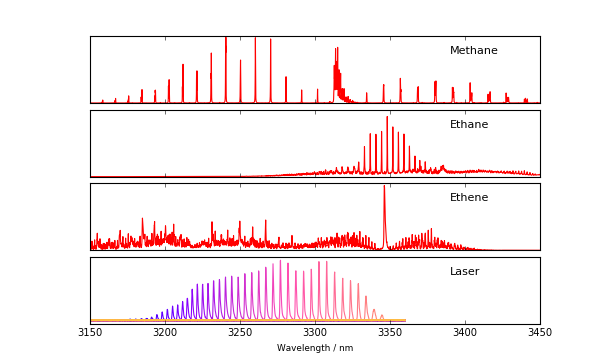

In [49]:
fig,axs=plt.subplots(4, 1, sharex=True)

In [50]:

x_array_all=test.spectrum_df['x_axes','wavelength']

In [51]:
y_axis='Methane'
y_array_all=test.spectrum_df['y_axes',y_axis]
axs[0].plot(x_array_all,y_array_all,color='r',label='Methane')
axs[0].text(0.8,0.7,y_axis,verticalalignment='bottom', horizontalalignment='left',
        transform=axs[0].transAxes,fontsize=10)

In [52]:
y_axis='Ethane'
y_array_all=test.spectrum_df['y_axes',y_axis]
axs[1].plot(x_array_all,y_array_all,color='r',label='Ethane')
axs[1].text(0.8,0.7,y_axis,verticalalignment='bottom', horizontalalignment='left',
        transform=axs[1].transAxes,fontsize=10)

In [53]:
ethene=np.genfromtxt(r"C:\Data\Python\DGA_simulator\PNNL-files\C2H4.csv",delimiter=',',skip_header=1)

In [54]:
ethene[:,0]=10000/ethene[:,0]*1000

In [55]:
axs[2].plot(ethene[:,0],ethene[:,1],color='r',label='Ethene')
axs[2].text(0.8,0.7,'Ethene',verticalalignment='bottom', horizontalalignment='left',
        transform=axs[2].transAxes,fontsize=10)

In [56]:
laser=overview_tuning.overview_tuning("C:\Data\Results\Auto_measurements\PN-12-024-SN0001\DGA_lineshape.txt")

In [57]:
laser.tuning_plot(ax=axs[3])
axs[3].text(0.8,0.7,'Laser',verticalalignment='bottom', horizontalalignment='left',
        transform=axs[3].transAxes,fontsize=10)

In [58]:
axs[0].set_xlim(3150,3450)

(3150, 3450)

In [59]:
for ax in axs:
    ax.yaxis.set_visible(False)

In [60]:
axs[3].legend_.remove()
fig.axes[-1].set_visible(False)

In [61]:
fig.savefig(r"C:\Users\CTCHguest\Desktop\PN12-024-SN0001_tuning_range.jpg",dpi=300)